# 🧪 Cleaning Lab Notebook Experimental Data

**Dataset**: Simulated lab experiments with inconsistencies  
**Objective**: Clean and standardise the dataset for further analysis.

This project demonstrates how to clean and standardize a messy experimental dataset commonly found in research lab notebooks.  
It includes inconsistent units, missing values, and outlier data —ideal for practicing real-world data cleaning and preprocessing.


## 1. 📥 Load Packages & Dataset

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the messy dataset
df = pd.read_csv("../data/messy_datasets/lab_notebook_data_messy.csv")
df.head()

,experiment_id,researcher,chemical_used,quantity,quantity_unit,temperature,temperature_unit,pressure_atm,reaction_time,reaction_time_unit,success_status
0,1,Sandra,Reactant D,18.789552,g,124.540228,C,1.64,45,min,Failure
1,2,Sandra,Solvent A,47.540644,g,114.854897,C,1.39,58,min,Failure
2,3,Sandra,Solvent A,36.626498,g,83.186651,C,7.86,14,min,Success
3,4,Marion,Reactant D,29.973058,g,108.778278,C,1.10,150,min,NaN
4,5,Joseph,Solvent A,7.885330,g,85.717394,C,5.51,84,min,Success


## 2. 🔍 Exploratory Data Analysis (EDA)

We start by understanding the structure, types of data, and inconsistencies in the dataset.

In [36]:
# 2.1 Get columns, non-null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experiment_id       50000 non-null  int64  
 1   researcher          50000 non-null  object 
 2   chemical_used       45053 non-null  object 
 3   quantity            50000 non-null  float64
 4   quantity_unit       50000 non-null  object 
 5   temperature         50000 non-null  float64
 6   temperature_unit    50000 non-null  object 
 7   pressure_atm        50000 non-null  float64
 8   reaction_time       50000 non-null  int64  
 9   reaction_time_unit  50000 non-null  object 
 10  success_status      45071 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.2+ MB


In [47]:
# 2.2 Get size of dataset
df.shape  # (rows, columns)

(50000, 14)

In [51]:
# 2.3 Summary statistics
df.describe(include='all')  # include='all' shows both numerical and categorical stats

,experiment_id,researcher,chemical_used,quantity,quantity_unit,temperature,temperature_unit,pressure_atm,reaction_time,reaction_time_unit,success_status,quantity_g,temperature_C,reaction_time_min
count,50000.000000,50000,45053,50000.000000,50000,50000.000000,50000,50000.000000,50000.000000,50000,45071,50000.000000,50000.000000,5.000000e+04
unique,NaN,5,5,NaN,2,NaN,2,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,Joseph,Solvent A,NaN,g,NaN,C,NaN,NaN,min,Success,NaN,NaN,NaN
freq,NaN,10136,9121,NaN,45151,NaN,42456,NaN,NaN,44918,15057,NaN,NaN,NaN
mean,25000.500000,NaN,NaN,2419.086665,NaN,128.466153,NaN,5.267378,1047.998520,NaN,NaN,24.993284,110.323682,5.485459e+04
std,14433.901067,NaN,NaN,8554.375523,NaN,73.902061,NaN,2.737133,3117.592222,NaN,NaN,14.391479,52.011195,1.893000e+05
min,1.000000,NaN,NaN,0.100276,NaN,20.002839,NaN,0.500000,-999.000000,NaN,NaN,0.100276,20.002839,-5.994000e+04
25%,12500.750000,NaN,NaN,13.893747,NaN,72.996972,NaN,2.890000,87.000000,NaN,NaN,12.520603,65.050910,8.700000e+01
50%,25000.500000,NaN,NaN,27.726339,NaN,121.260854,NaN,5.300000,169.000000,NaN,NaN,24.994706,110.533434,1.690000e+02
75%,37500.250000,NaN,NaN,41.492063,NaN,169.702040,NaN,7.620000,251.000000,NaN,NaN,37.440240,155.374356,2.510000e+02


In [53]:
# 2.4 Check for missing values
df.isnull().sum()

experiment_id            0
researcher               0
chemical_used         4947
quantity                 0
quantity_unit            0
temperature              0
temperature_unit         0
pressure_atm             0
reaction_time            0
reaction_time_unit       0
success_status        4929
quantity_g               0
temperature_C            0
reaction_time_min        0
dtype: int64

In [55]:
# 2.5 Check for duplicates
df.duplicated().sum()

0

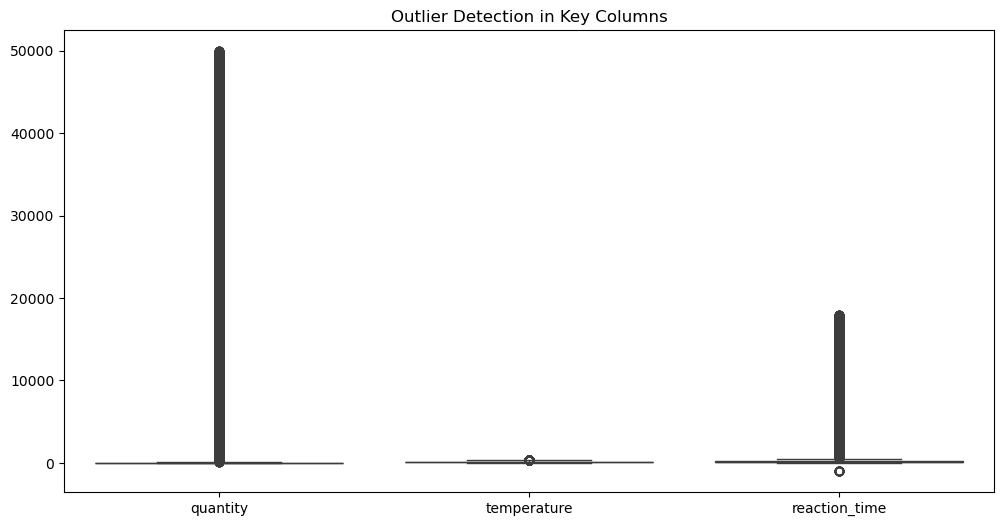

,experiment_id,researcher,chemical_used,quantity,quantity_unit,temperature,temperature_unit,pressure_atm,reaction_time,reaction_time_unit,success_status,quantity_g,temperature_C,reaction_time_min
832,833,Ernest,Solvent B,7.128765,g,95.736080,C,3.30,-999,min,Failure,7.128765,95.736080,-999
1408,1409,Ernest,Solvent B,29.309183,g,161.109840,C,9.76,-999,min,Failure,29.309183,161.109840,-999
3334,3335,Ernest,Reactant D,44.531435,g,124.420098,C,9.47,-999,min,Partial Success,44.531435,124.420098,-999
4363,4364,Lea,Reactant D,26.217728,g,139.704562,F,9.47,-999,min,Success,26.217728,59.835868,-999
6728,6729,Joseph,Catalyst C,48.081032,g,161.789796,C,5.75,-999,min,Partial Success,48.081032,161.789796,-999
8400,8401,Lea,Catalyst C,25001.905028,mg,83.536259,C,7.59,-999,min,Failure,25.001905,83.536259,-999
9208,9209,Joseph,Reactant D,39.616136,g,145.021753,C,4.04,-999,min,Partial Success,39.616136,145.021753,-999
11293,11294,Joseph,Solvent B,36562.273530,mg,133.011122,C,3.00,-999,min,Failure,36.562274,133.011122,-999
12131,12132,Joseph,Buffer E,13.699305,g,156.644892,C,0.94,-999,min,Failure,13.699305,156.644892,-999
17192,17193,Sandra,Buffer E,17.688988,g,34.444259,C,1.07,-999,min,Success,17.688988,34.444259,-999


In [57]:
# 2.6 Check for outliers or weird values

# Boxplot for numerical columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['quantity', 'temperature', 'reaction_time']])
plt.title("Outlier Detection in Key Columns")
plt.show()

# Look at potential negative values
df[df['reaction_time'] < 0]

In [84]:
# 2.7 Check consistency across related columns
# Temperature values must be above ~60 in F
df[df['temperature_unit'] == 'F']['temperature'].describe()

count    7544.000000
mean      230.549844
std        93.128743
min        68.008920
25%       148.300002
50%       231.892801
75%       310.666926
max       391.948095
Name: temperature, dtype: float64

In [82]:
# 2.8 Check consistency across related columns
df[df['quantity_unit'] == 'mg']['quantity'].describe()

count     4849.000000
mean     24711.176237
std      14292.667085
min        105.225069
25%      12412.696291
50%      24461.677916
75%      36928.739607
max      49957.939699
Name: quantity, dtype: float64

## 3. 🧹 Data Cleaning

In [45]:
# 3.1 Converting to grams
def convert_quantity(row):
    if row['quantity_unit'] == 'mg':
        return row['quantity'] / 1000  # convert mg to g
    return row['quantity']

df['quantity_g'] = df.apply(convert_quantity, axis=1)

# 3.2 Convert temperature to °C
def convert_temp(row):
    if row['temperature_unit'] == 'F':
        return (row['temperature'] - 32) / 1.8
    return row['temperature']

df['temperature_C'] = df.apply(convert_temp, axis=1)

## 3.3 Convert time to min
def convert_time(row):
    if row['reaction_time_unit'] == 'hr':
        return row['reaction_time'] * 60
    return row['reaction_time']

df['reaction_time_min'] = df.apply(convert_time, axis=1)